In [1]:
# import
import numpy as np
from qiskit import *
from qiskit import Aer
from qiskit.visualization import plot_histogram, plot_state_city
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options

In [2]:
#création des deux qbit

In [3]:
circ = QuantumCircuit(2)

In [4]:
circ.h(0)
circ.h(1)

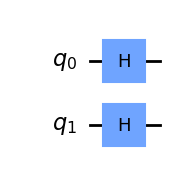

In [5]:
circ.draw('mpl',style='clifford')

In [6]:
circ.barrier()

In [7]:
# oracle

In [8]:
circ.x(0)
circ.cz(0,1)
circ.x(0)

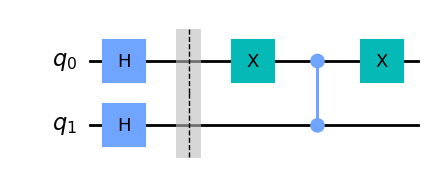

In [9]:

circ.draw('mpl',style='clifford')

In [10]:
#diffuseur
circ.barrier()
circ.h(0)
circ.h(1)
circ.z(0)
circ.z(1)
circ.cz(0,1)
circ.h(0)
circ.h(1)

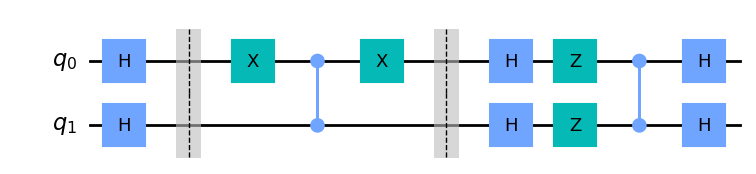

In [11]:

circ.draw('mpl',style='clifford')

In [12]:
#mesurer 

In [13]:
meas = QuantumCircuit(2)
meas.measure_all()

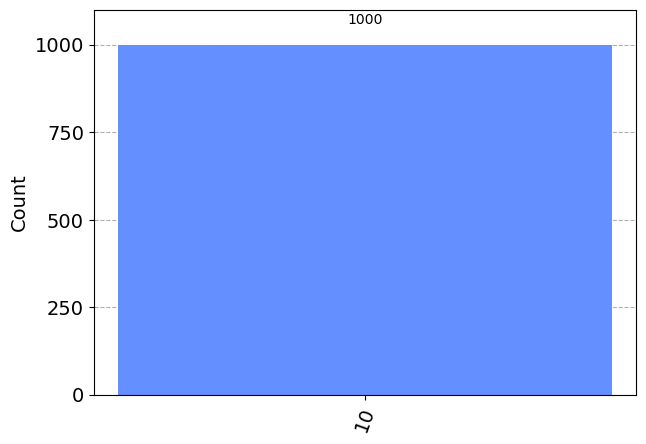

In [14]:
backend = BasicAer.get_backend('qasm_simulator') # the device to run on
circ = circ.compose(meas)
result = backend.run(transpile(circ, backend), shots=1000).result()
counts  = result.get_counts(circ)
plot_histogram(counts)